In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [2]:
geocodes = ['Københavns Kommune', 'Frederiksberg Kommune']
city = ox.geocode_to_gdf(geocodes)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


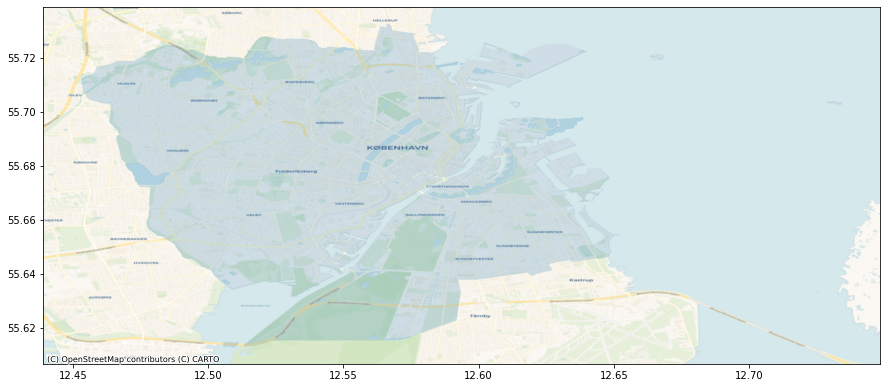

In [3]:
f, ax = plt.subplots(figsize=(15,15))
city.plot(ax=ax, alpha=.2)
cx.add_basemap(ax=ax, crs=city.crs, source=cx.providers.CartoDB.Voyager)

In [4]:
G = ox.graph_from_place(geocodes, network_type='bike')

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [9]:
G.edges[(118725, 298795432, 0)]

{'osmid': 27226011,
 'oneway': True,
 'name': 'Banegårdspladsen',
 'highway': 'tertiary',
 'maxspeed': '30',
 'length': 112.872,
 'geometry': <shapely.geometry.linestring.LineString at 0x773315f5c430>}

In [14]:
betweenness = nx.edge_betweenness_centrality(G, weight='length', k=100)

In [39]:
nx.set_edge_attributes(G, betweenness, "betweenness")

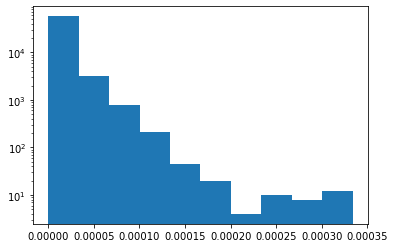

In [43]:
f, ax = plt.subplots()
ax.hist(betweenness.values())
ax.set_yscale('log')

In [44]:
nodes, edges = ox.graph_to_gdfs(G)

In [46]:
with open('data/nodes.json', 'w') as f:
    f.write(nodes.to_json(show_bbox=True))

In [47]:
with open('data/edges.json', 'w') as f:
    f.write(edges.to_json(show_bbox=True))